# Initialise the necessary files and import all modules

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

%matplotlib inline

movies = pd.read_csv("fandango_score_comparison.csv")

# print (movies.head())


# Histograms

Create a histogram of the Metacritic_norm_round column.

Create a histogram of the Fandango_Stars column.

Look critically at both histograms, and write up any differences you see in a markdown cell.

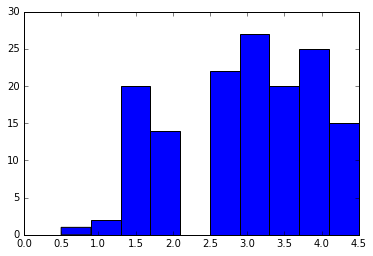

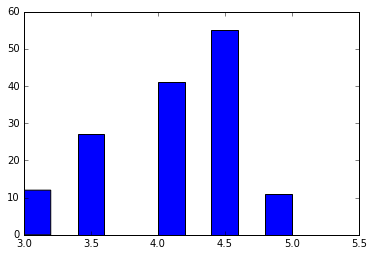

In [43]:
plt.hist(movies['Metacritic_norm_round'])
plt.show()

plt.hist(movies['Fandango_Stars'])
plt.show()

Fandango Ratings seem to start at 3 and above (no 1s and 2s), where as Metacritic has average 0 to 4.5 (where is 2.5 and 5 though)

# Mean, Median and Std

Calculate the mean of both Fandango_Stars and Metacritic_norm_round.

Calculate the median of both Fandango_Stars and 
Metacritic_norm_round.

Calculate the standard deviation of both Fandango_Stars and Metacritic_norm_round. You can use the numpy.std method to find this.

Print out all the values and look over them.

Look at the review methodologies for Metacritic and Fandango. You can find the methodologies on their websites, or by using Google. Do you see any major differences? Write them up in a markdown cell.

Write up the differences in numbers in a markdown cell, including the following:
Why would the median for Metacritic_norm_round be lower than the mean, but the median for Fandango_Stars is higher than the mean? 

Recall that the mean is usually larger than the median when there are a few large values in the data, and lower when there are a few small values.

Why would the standard deviation for Fandango_Stars be much 
lower than the standard deviation for Metacritic_norm_round?
Why would the mean for Fandango_Stars be much higher than the mean for Metacritic_norm_round.

In [44]:
# Means
meanFS = movies['Fandango_Stars'].mean()
meanMeta = movies['Metacritic_norm_round'].mean()

# Median
medianFS = movies['Fandango_Stars'].median()
medianMeta = movies['Metacritic_norm_round'].median()

# Standard Deviation
StdFS = movies['Fandango_Stars'].std()
StdMeta = movies['Metacritic_norm_round'].std()

print ("Fandango Stars - ")
print ("Mean of Fandango Stars:", meanFS)
print ("Median of Fandango Stars", medianFS)
print ("Std of Fandango Stars:", StdFS)
print ("")
print ("Metacritic Ratings - ")
print ("Mean of Metacritic Ratings:", meanMeta)
print ("Median of Metacritic Ratings:", medianMeta)
print ("Std of Metacritic Ratings:", StdMeta)

Fandango Stars - 
Mean of Fandango Stars: 4.08904109589
Median of Fandango Stars 4.0
Std of Fandango Stars: 0.540385977979

Metacritic Ratings - 
Mean of Metacritic Ratings: 2.97260273973
Median of Metacritic Ratings: 3.0
Std of Metacritic Ratings: 0.990960561374


# Scatter Plots

Make a scatterplot that compares the Fandango_Stars column to the Metacritic_norm_round column.

Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa. We can explore this further by finding the differences between the columns.

Subtract the Fandango_Stars column from the Metacritic_norm_round column, and assign to a new column, fm_diff, in movies.

Assign the absolute value of fm_diff to fm_diff. This will ensure that we don't only look at cases where Metacritic_norm_round is greater than Fandango_Stars.

You can calculate absolute values with the absolute function in NumPy.

Sort movies based on the fm_diff column, in descending order.

Print out the top 5 movies with the biggest differences between Fandango_Stars and Metacritic_norm_round.

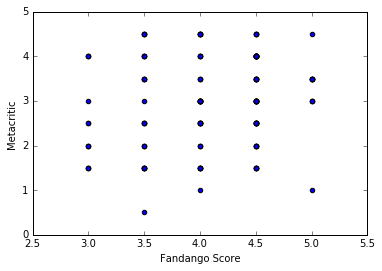

3       Do You Believe? (2015)
85           Little Boy (2015)
47                Annie (2014)
19               Pixels (2015)
134    The Longest Ride (2015)
Name: FILM, dtype: object


In [45]:
# make the scatter plot

plt.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
plt.xlabel("Fandango Score")
plt.ylabel("Metacritic")
plt.show()

# subtract Fandago Stars column with Metacritic column 

movies['fm_diff'] = abs(movies['Fandango_Stars'] - movies['Metacritic_norm_round'])

movies.sort_values("fm_diff", inplace=True, ascending=False)

print (movies['FILM'].head())


# Correlations

Calculate the r-value measuring the correlation between Fandango_Stars and Metacritic_norm_round using the scipy.stats.pearsonr function.

The correlation is actually fairly low. Write up a markdown cell that discusses what this might mean.

Use the scipy.stats.linregress function create a linear regression with Metacritic_norm_round as the x-values and Fandango_Stars as the y-values.

Predict what a movie that got a 3.0 in Metacritic would get on Fandango using the formula pred_3 = 3 * slope + intercept.

In [51]:
r, p_value = pearsonr( movies["Fandango_Stars"], movies["Metacritic_norm_round"])

print (r)

slope, intercept, r_value, p_value, stderr_slope = linregress(movies['Fandango_Stars'] , movies['Metacritic_norm_round'])

pred_3 = 3 * slope + intercept

print (pred_3)

0.178449190739
2.61622452281


# Finding Residuals

Predict what a movie that got a 1.0 in Metacritic would get on Fandango using the line from the last screen.

Predict what a movie that got a 5.0 in Metacritic would get on Fandango using the line from the last screen.

Make a scatter plot using the scatter function in matplotlib.pyplot.

On top of the scatter plot, use the plot function in matplotlib.pyplot to plot a line using the predicted values for 1.0 and 5.0.

Setup the x values as the list [1.0, 5.0].

The y values should be a list with the corresponding predictions.

Pass in both x and y to plot to create a line.

Set the x-limits of the plot to 1 and 5 using the pyplot.xlim() method.

Show the plot.

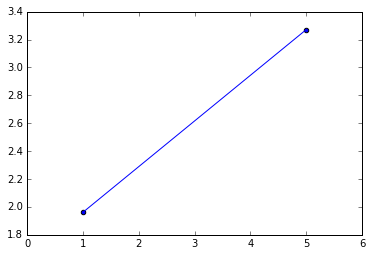

In [56]:
def linearpred (x_value):
    return (x_value*slope + intercept)

xvalues = [1.0, 5.0]
yvalues = []
for i in xvalues:
    yvalues.append(linearpred(i))

plt.scatter(xvalues, yvalues)
plt.plot(xvalues, yvalues)
plt.xlim(0,6)
plt.show()

Other potential areas - 

Explore the other rating services, IMDB and RottenTomatoes.
    See how they differ from each other.
    See how they differ from Fandango.

See how user scores differ from critic scores.

Acquire more recent review data, and see if the pattern of Fandango inflating reviews persists.

Dig more into why certain movies had their scores inflated more than others.